In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
DATA_PATH = "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df.head()


,date,state,district_x,pincode_x,age_0_5,age_5_17,age_18_greater,district_y,pincode_y,demo_age_5_17,demo_age_17_,district,pincode,bio_age_5_17,bio_age_17_,total_enrolment,demographic_updates,biometric_updates,DUI,BUBI
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,0,0.0,0.0,0.0,0,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,SitamarhiSitamarhiPurbi ChamparanSitamarhiSita...,6723137,206,633,166,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1005,0.0,0.0,0.0,0.0
2,2025-03-09,Delhi,West DelhiWest Delhi,220077,122,53,57,0,0.0,0.0,0.0,0,0.0,0.0,0.0,232,0.0,0.0,0.0,0.0
3,2025-03-09,Haryana,FaridabadGurugram,243005,98,79,23,0,0.0,0.0,0.0,0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
4,2025-03-09,Karnataka,Bengaluru UrbanBengaluru UrbanBengaluru UrbanB...,2240159,63,80,105,0,0.0,0.0,0.0,0,0.0,0.0,0.0,248,0.0,0.0,0.0,0.0


In [ ]:
print(df.shape)
print(df.columns)
print(df.isna().sum())


(3393, 20)
Index(['date', 'state', 'district_x', 'pincode_x', 'age_0_5', 'age_5_17',
       'age_18_greater', 'district_y', 'pincode_y', 'demo_age_5_17',
       'demo_age_17_', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'total_enrolment', 'demographic_updates', 'biometric_updates', 'DUI',
       'BUBI'],
      dtype='object')
date                     0
state                    0
district_x               0
pincode_x                0
age_0_5                  0
age_5_17                 0
age_18_greater           0
district_y               0
pincode_y                0
demo_age_5_17            0
demo_age_17_             0
district                 0
pincode                  0
bio_age_5_17             0
bio_age_17_              0
total_enrolment          0
demographic_updates      0
biometric_updates        0
DUI                      0
BUBI                   142
dtype: int64


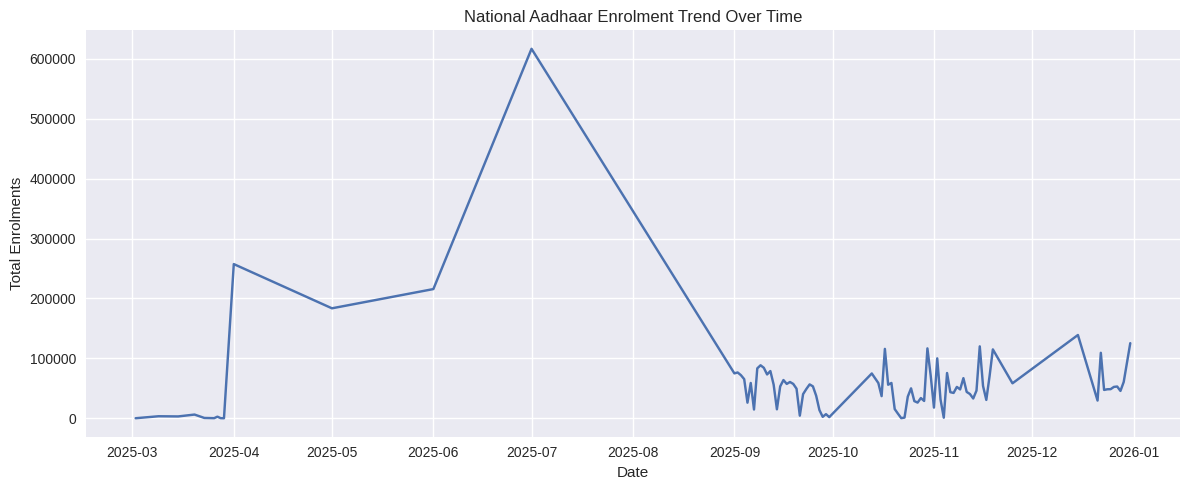

In [ ]:
national_trend = df.groupby("date")["total_enrolment"].sum()

plt.figure(figsize=(12,5))
plt.plot(national_trend.index, national_trend.values)
plt.title("National Aadhaar Enrolment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


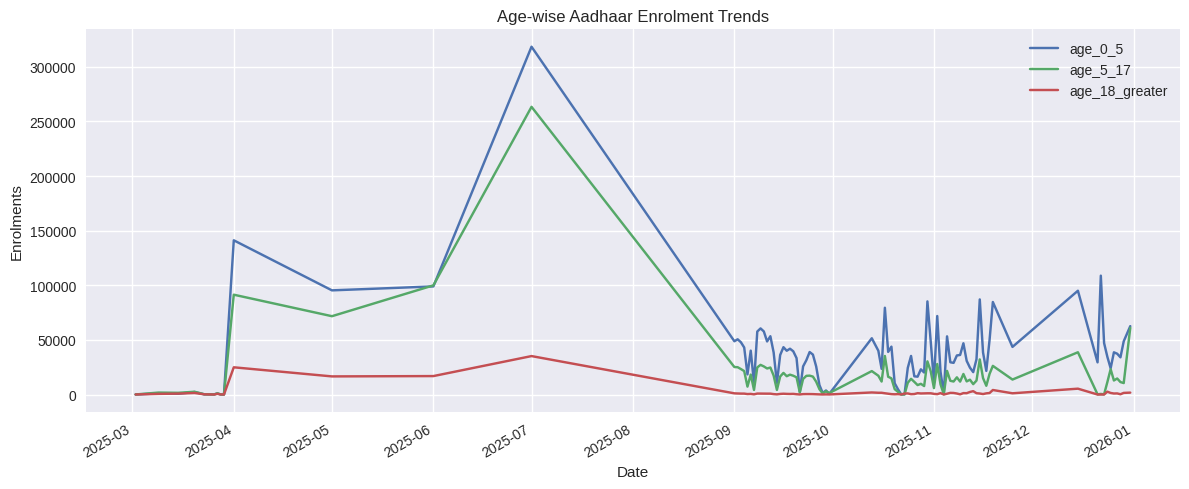

In [ ]:
age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
age_trend = df.groupby("date")[age_cols].sum()

age_trend.plot(figsize=(12,5))
plt.title("Age-wise Aadhaar Enrolment Trends")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.tight_layout()
plt.show()


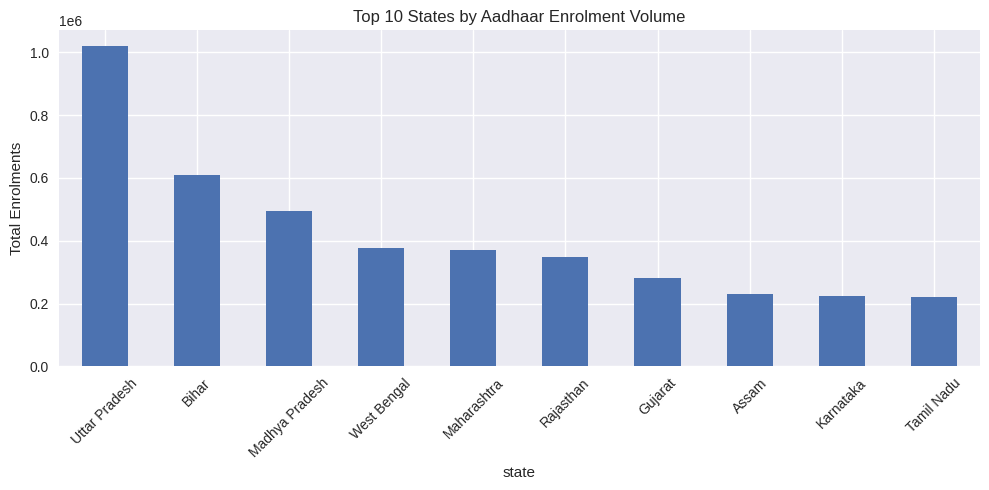

In [ ]:
state_enrol = (
    df.groupby("state")["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
state_enrol.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment Volume")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"
import os
os.makedirs(FIG_PATH, exist_ok=True)

plt.figure(figsize=(12,5))
plt.plot(national_trend.index, national_trend.values)
plt.title("National Aadhaar Enrolment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/national_enrolment_trend.png", dpi=300)
plt.close()


In [ ]:
import os

FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"
os.makedirs(FIG_PATH, exist_ok=True)


In [ ]:
plt.figure(figsize=(12,5))
age_trend.plot()
plt.title("Age-wise Aadhaar Enrolment Trends")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/agewise_enrolment_trend.png", dpi=300)
plt.close()

print("Saved: agewise_enrolment_trend.png")


Saved: agewise_enrolment_trend.png


<Figure size 1200x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
state_enrol.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment Volume")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/top10_states_enrolment.png", dpi=300)
plt.close()

print("Saved: top10_states_enrolment.png")


Saved: top10_states_enrolment.png


In [ ]:
os.listdir(FIG_PATH)


['national_enrolment_trend.png',
 'agewise_enrolment_trend.png',
 'top10_states_enrolment.png']